In [68]:
# Se importan las librerías a usar
import pandas as pd
import numpy as np
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 150)
pd.set_option('display.max_seq_items', None)
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
import plotly.express as px
warnings.filterwarnings('ignore')

In [109]:
# Se importa el dataset
wec = pd.read_csv(r'..\\datasets\\World_Energy_Consumption.csv')  

In [110]:
# Se consultan la cantidad de filas y columnas 
forma = wec.shape
f"El dataset tiene {forma[0]} filas y {forma[1]} columnas"

'El dataset tiene 17432 filas y 122 columnas'

In [111]:
# Se verifica que no hayan filas duplicadas
dupl = wec.duplicated()
print(dupl.value_counts())

False    17432
dtype: int64


In [112]:
# Se consultan los nombres de las columnas
print(wec.columns)

Index(['iso_code', 'country', 'year', 'coal_prod_change_pct', 'coal_prod_change_twh', 'gas_prod_change_pct', 'gas_prod_change_twh',
       'oil_prod_change_pct', 'oil_prod_change_twh', 'energy_cons_change_pct', 'energy_cons_change_twh', 'biofuel_share_elec',
       'biofuel_elec_per_capita', 'biofuel_cons_change_pct', 'biofuel_share_energy', 'biofuel_cons_change_twh', 'biofuel_consumption',
       'biofuel_cons_per_capita', 'carbon_intensity_elec', 'coal_share_elec', 'coal_cons_change_pct', 'coal_share_energy', 'coal_cons_change_twh',
       'coal_consumption', 'coal_elec_per_capita', 'coal_cons_per_capita', 'coal_production', 'coal_prod_per_capita', 'electricity_generation',
       'biofuel_electricity', 'coal_electricity', 'fossil_electricity', 'gas_electricity', 'hydro_electricity', 'nuclear_electricity',
       'oil_electricity', 'other_renewable_electricity', 'other_renewable_exc_biofuel_electricity', 'renewables_electricity', 'solar_electricity',
       'wind_electricity', 'energ

## Valores nulos

In [113]:
# Se observan cuántos valores faltantes tiene cada columna (ordenados de mayor a menor)
missing_values = wec.isnull().sum().sort_values(ascending = False) 
missing_values

biofuel_cons_change_pct                    16913
carbon_intensity_elec                      16844
solar_cons_change_pct                      16107
nuclear_cons_change_pct                    15910
wind_cons_change_pct                       15889
other_renewables_cons_change_pct           15106
hydro_cons_change_pct                      13768
gas_cons_change_pct                        13728
coal_cons_change_pct                       13670
renewables_cons_change_pct                 13604
low_carbon_cons_change_pct                 13597
biofuel_elec_per_capita                    13243
fossil_cons_change_pct                     13231
oil_cons_change_pct                        13231
oil_cons_change_twh                        13231
fossil_cons_change_twh                     13231
biofuel_share_elec                         13226
low_carbon_cons_change_twh                 13225
coal_cons_change_twh                       13225
nuclear_cons_change_twh                    13225
other_renewables_con

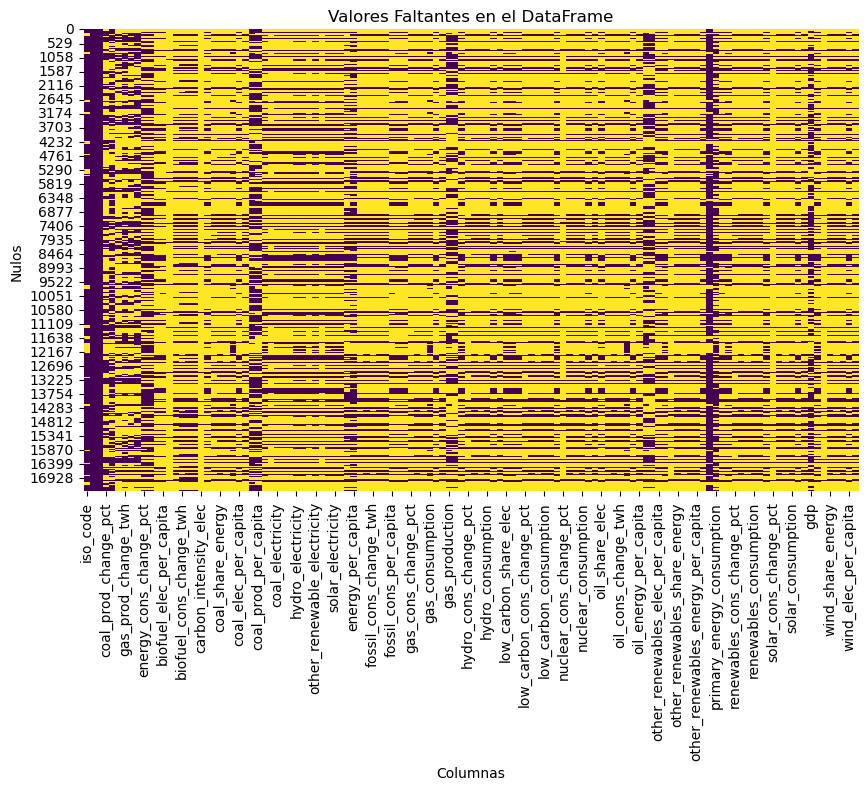

In [114]:
# Se visualiza los valores faltantes
plt.figure(figsize=(10, 6))
sns.heatmap(wec.isnull(), cmap='viridis', cbar=False)
plt.title('Valores Faltantes en el DataFrame')
plt.xlabel('Columnas')
plt.ylabel('Nulos')
plt.show()

Como se observa en el gráfico el set de datos posee varios valores nulos y posteriormente se realizará su tratamiento, que será un gran desafío. 

## Columna: country

In [115]:
# Se obtienen los valores unicos de la columna country para determinar los países con los que se trabajará
wec['country'].unique()           

array(['Afghanistan', 'Africa', 'Albania', 'Algeria', 'American Samoa',
       'Angola', 'Antigua and Barbuda', 'Argentina', 'Armenia', 'Aruba',
       'Asia Pacific', 'Australia', 'Austria', 'Azerbaijan', 'Bahamas',
       'Bahrain', 'Bangladesh', 'Barbados', 'Belarus', 'Belgium',
       'Belize', 'Benin', 'Bermuda', 'Bhutan', 'Bolivia',
       'Bosnia and Herzegovina', 'Botswana', 'Brazil',
       'British Virgin Islands', 'Brunei', 'Bulgaria', 'Burkina Faso',
       'Burundi', 'CIS', 'Cambodia', 'Cameroon', 'Canada', 'Cape Verde',
       'Cayman Islands', 'Central African Republic', 'Central America',
       'Chad', 'Chile', 'China', 'Colombia', 'Comoros', 'Congo',
       'Cook Islands', 'Costa Rica', "Cote d'Ivoire", 'Croatia', 'Cuba',
       'Cyprus', 'Czechia', 'Czechoslovakia',
       'Democratic Republic of Congo', 'Denmark', 'Djibouti', 'Dominica',
       'Dominican Republic', 'Eastern Africa', 'Ecuador', 'Egypt',
       'El Salvador', 'Equatorial Guinea', 'Eritrea', 'Estonia'

Se observa que no sólo hay países en la columna country, sino también regiones y/o países que ya no exiten, que se excluirán.

In [116]:
# Se filtan las filas del DataFrame, donde el valor en la columna "iso_code" no es nulo.
wec_s= wec[~wec["iso_code"].isnull()]
wec_s= wec_s[~(wec["country"] == "World")]

In [117]:
# Se seleccionan las columnas de interés 
wec_s= wec_s[["country", "iso_code", "year", "population","electricity_generation","biofuel_electricity", "coal_electricity", "fossil_electricity", "gas_electricity", "hydro_electricity","oil_electricity", "other_renewable_electricity", "other_renewable_exc_biofuel_electricity", "renewables_electricity", "solar_electricity","wind_electricity", "biofuel_elec_per_capita", "coal_elec_per_capita", "energy_per_capita", "fossil_cons_per_capita", "gas_consumption", "gas_production", "hydro_cons_change_pct", "low_carbon_share_elec", "oil_share_elec", "oil_energy_per_capita", "other_renewables_elec_per_capita", "other_renewables_energy_per_capita", "primary_energy_consumption", "solar_consumption", "gdp", "wind_elec_per_capita"]]

## Columna: year

Se observa que los datos anteriores al año 2010 son escasos, por lo que se decide eliminarlos 

In [118]:
# Se eliminan las filas correspondientes a los años 1999 hasta 1983 inclusive, ya que se que verifica que la mayoría de los países no cuentan con esta información
wec_s= wec_s[(wec_s['year'] > 2015)]

# Se eliminan las columnas que no se utilizarán  
suram.drop(columns=['low_carbon_cons_change_pct','nuclear_cons_change_pct','wind_cons_change_twh','wind_cons_change_pct','solar_cons_change_pct', 'solar_cons_change_twh', 'renewables_cons_change_twh','renewables_cons_change_pct', 'low_carbon_share_energy','carbon_intensity_elec','biofuel_cons_change_pct','coal_prod_change_pct','coal_cons_change_pct','other_renewables_cons_change_pct','wind_cons_change_pct','gas_cons_change_twh','hydro_cons_change_pct','gas_cons_change_pct','nuclear_energy_per_capita','oil_cons_change_pct', 'fossil_cons_change_twh','nuclear_consumption','other_renewables_cons_change_twh','fossil_cons_change_pct','nuclear_cons_change_twh','oil_cons_change_twh','hydro_cons_change_twh','coal_prod_change_twh','gas_prod_change_pct','gas_prod_change_twh',	'oil_prod_change_pct',	'oil_prod_change_twh','energy_cons_change_pct',	'energy_cons_change_twh','biofuel_cons_change_twh','nuclear_share_elec','biofuel_share_elec','biofuel_elec_per_capita',	'biofuel_consumption',	'biofuel_cons_per_capita','nuclear_share_energy', 'nuclear_elec_per_capita','biofuel_share_energy','coal_cons_change_twh','low_carbon_cons_change_twh','coal_production','coal_prod_per_capita','gas_production','gas_prod_per_capita','hydro_consumption','other_renewables_share_energy','gas_energy_per_capita','hydro_share_energy','hydro_energy_per_capita','low_carbon_consumption','low_carbon_energy_per_capita','oil_share_energy','oil_consumption','oil_energy_per_capita','other_renewable_consumption','gas_share_energy','other_renewables_energy_per_capita','renewables_share_energy','renewables_consumption','renewables_energy_per_capita','solar_share_energy','solar_consumption','solar_energy_per_capita','wind_share_energy','wind_consumption','wind_energy_per_capita','fossil_energy_per_capita','gas_consumption','coal_share_energy','coal_consumption','fossil_share_energy','coal_cons_per_capita','fossil_fuel_consumption','oil_production','oil_prod_per_capita','gdp','energy_per_gdp'], inplace=True)

Se eliminaron de forma manual las columnas, ya que se verificó cada columna y su comportamiento respecto del recuento total de valores nulos.

In [119]:
# Se observan cuántos valores faltantes tiene cada columna del data set suram: (ordenados de mayor a menor): de acuerdo a la columna
missing_values_wec_s = wec_s.isnull().sum().sort_values(ascending=False)
missing_values_wec_s

gdp                                        747
gas_production                             684
hydro_cons_change_pct                      630
solar_consumption                          594
other_renewables_energy_per_capita         594
oil_energy_per_capita                      594
gas_consumption                            594
energy_per_capita                          461
primary_energy_consumption                 458
population                                  80
biofuel_elec_per_capita                     26
coal_elec_per_capita                        26
fossil_cons_per_capita                      26
other_renewables_elec_per_capita            22
wind_elec_per_capita                        22
oil_share_elec                              18
low_carbon_share_elec                       14
biofuel_electricity                         14
other_renewable_exc_biofuel_electricity     14
coal_electricity                            14
oil_electricity                             14
fossil_electr

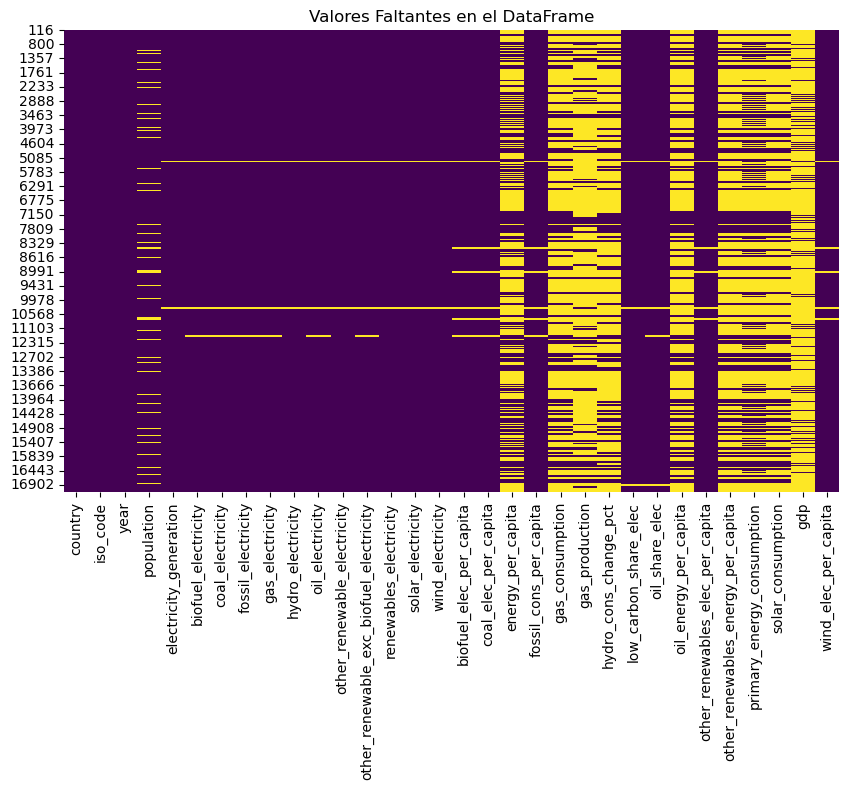

In [108]:
# visualización de valores faltantes
plt.figure(figsize=(10, 6))
sns.heatmap(wec_s.isnull(), cmap='viridis', cbar=False)
plt.title('Valores Faltantes en el DataFrame')
plt.show()

## Tratamiento de valores nulos

           country iso_code iso_code iso_code iso_code  year  population iso_code iso_code iso_code iso_code  electricity_generation  \
111    Afghanistan      AFG      AFG      AFG      AFG  2011  30117000.0      AFG      AFG      AFG      AFG                   0.847   
112    Afghanistan      AFG      AFG      AFG      AFG  2012  31161000.0      AFG      AFG      AFG      AFG                   0.912   
113    Afghanistan      AFG      AFG      AFG      AFG  2013  32270000.0      AFG      AFG      AFG      AFG                   1.103   
114    Afghanistan      AFG      AFG      AFG      AFG  2014  33371000.0      AFG      AFG      AFG      AFG                   1.154   
115    Afghanistan      AFG      AFG      AFG      AFG  2015  34414000.0      AFG      AFG      AFG      AFG                   1.178   
...            ...      ...      ...      ...      ...   ...         ...      ...      ...      ...      ...                     ...   
17427     Zimbabwe      ZWE      ZWE      ZWE   

El sistema de tratamiento de los valores nulos, elegido: rellena el valor nulo con el valor más cercano hacia adelante y luego hacia atrás. Para esto se observaron que los dstos faltantes al menos tuvieran valores no nulos dentro de los 7 años, para que los satos

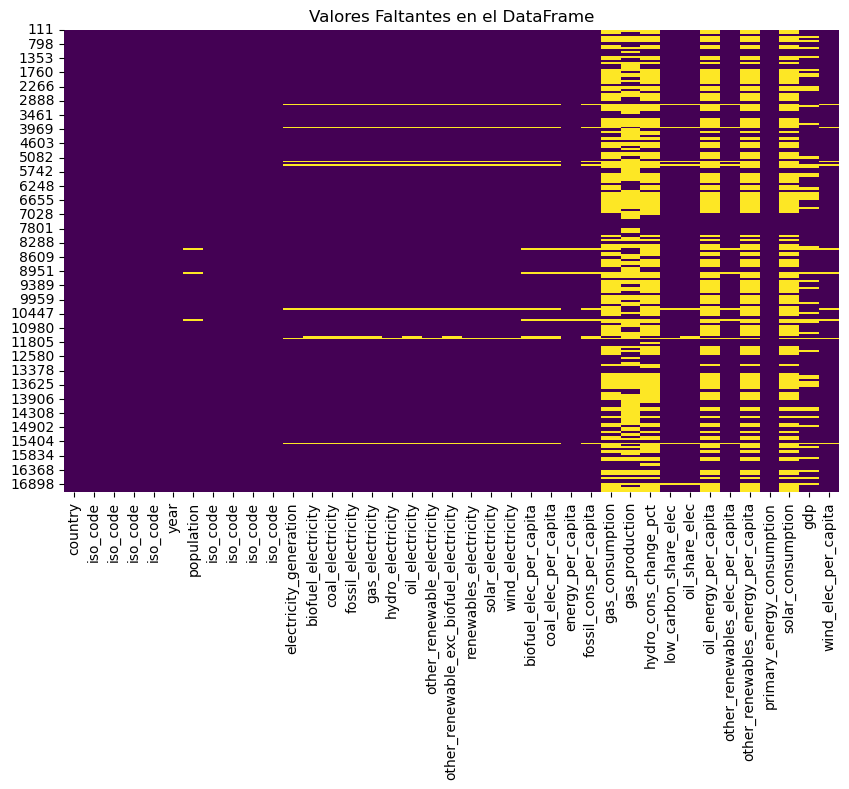

In [93]:
# visualización de valores faltantes
plt.figure(figsize=(10, 6))
sns.heatmap(wec_s.isnull(), cmap='viridis', cbar=False)
plt.title('Valores Faltantes en el DataFrame')
plt.show()

In [24]:
# Se guarda el data set
suram.to_csv('..\\datasets\\suram1.csv', index=False)

In [25]:
# Se muestra la electricidad que genera cada energía 
electrica= suram[['year', 'country','per_capita_electricity', 'electricity_generation','biofuel_electricity','coal_electricity','fossil_electricity','gas_electricity', 'hydro_electricity','nuclear_electricity','oil_electricity','other_renewable_electricity','other_renewable_exc_biofuel_electricity','renewables_electricity','solar_electricity','wind_electricity','energy_per_capita','population' ]]

In [26]:
# Se guarda el data set
electrica.to_csv('..\\datasets\\electrica.csv', index=False)

In [27]:
# Se importa el dataset
electrica= pd.read_csv(r'..\\datasets\\electrica.csv')  

In [28]:
# Se calculan los promedios de las diferentes fuentes de energía que generan electricidad de los países de America del Sur. 
columnas_a_promediar = ['country', 'biofuel_electricity','coal_electricity','fossil_electricity','gas_electricity', 'hydro_electricity','nuclear_electricity','oil_electricity','other_renewable_electricity','other_renewable_exc_biofuel_electricity','renewables_electricity','solar_electricity','wind_electricity']
promedios = electrica[columnas_a_promediar].mean()
print(promedios)
df_promedios = pd.DataFrame(promedios, columns=['Promedios'])
df_promedios = df_promedios.sort_values(by='Promedios')

biofuel_electricity                         2.665486
coal_electricity                            2.622746
fossil_electricity                         17.812924
gas_electricity                            12.175146
hydro_electricity                          44.530324
nuclear_electricity                         1.398248
oil_electricity                             3.015016
other_renewable_electricity                 2.669749
other_renewable_exc_biofuel_electricity     0.002302
renewables_electricity                     48.557352
solar_electricity                           0.175152
wind_electricity                            1.182102
dtype: float64


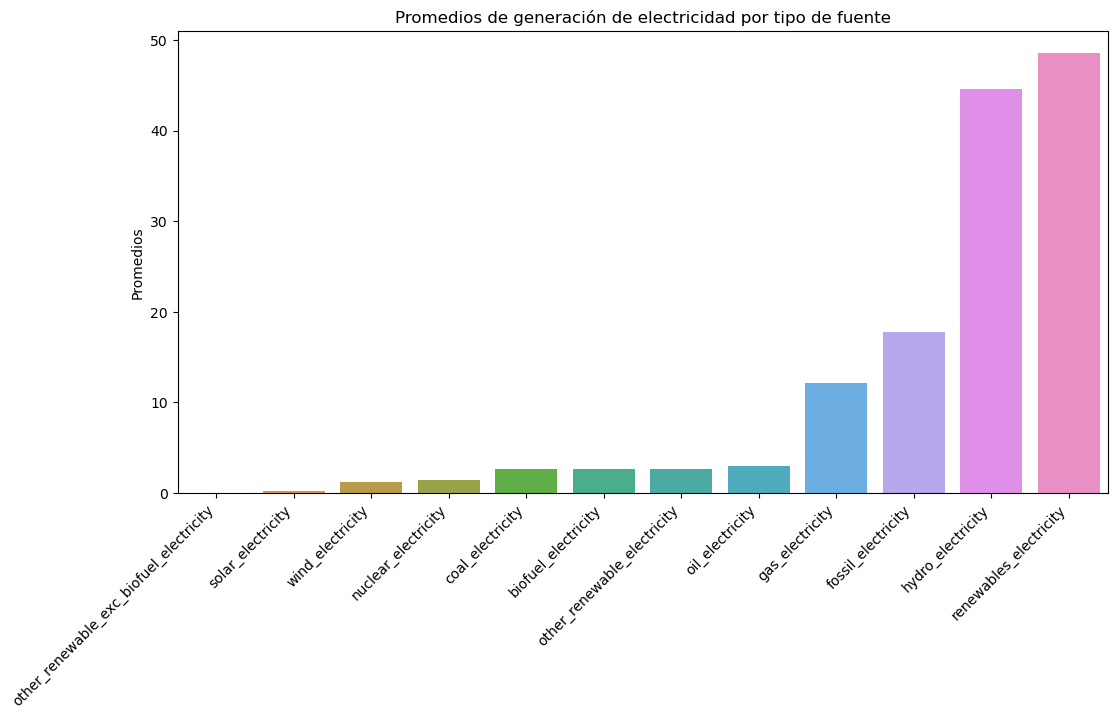

In [29]:
# Se grafican los promedios de las energías generadoras de electricidad de America del Sur 
sns.set_palette("viridis")
plt.figure(figsize=(12, 6))
sns.barplot(x=df_promedios.index, y='Promedios', data=df_promedios)
plt.xticks(rotation=45, ha='right')  
plt.title('Promedios de generación de electricidad por tipo de fuente')
plt.show()

Como se presumía, la mayor cantidad de generación de electricidad la producen los combustibles fósiles, en segundo lugar el carbón y en tercer lugar las energías renovables, que posterioremente se analizará en detalle, ya que resulta de interés porque son infitas y no producen gases de efecto invernadero. 

In [30]:
# Se calculan los promedios de las diferentes fuentes de energía que generan electricidad de los países de America del Sur. 
energiaslimpias= [ 'biofuel_electricity', 'hydro_electricity','other_renewable_electricity','other_renewable_exc_biofuel_electricity','solar_electricity','wind_electricity']
promedios = electrica[energiaslimpias].mean()
print(promedios)
df_promedios = pd.DataFrame(promedios, columns=['Promedios'])
df_promedios = df_promedios.sort_values(by='Promedios')

biofuel_electricity                         2.665486
hydro_electricity                          44.530324
other_renewable_electricity                 2.669749
other_renewable_exc_biofuel_electricity     0.002302
solar_electricity                           0.175152
wind_electricity                            1.182102
dtype: float64


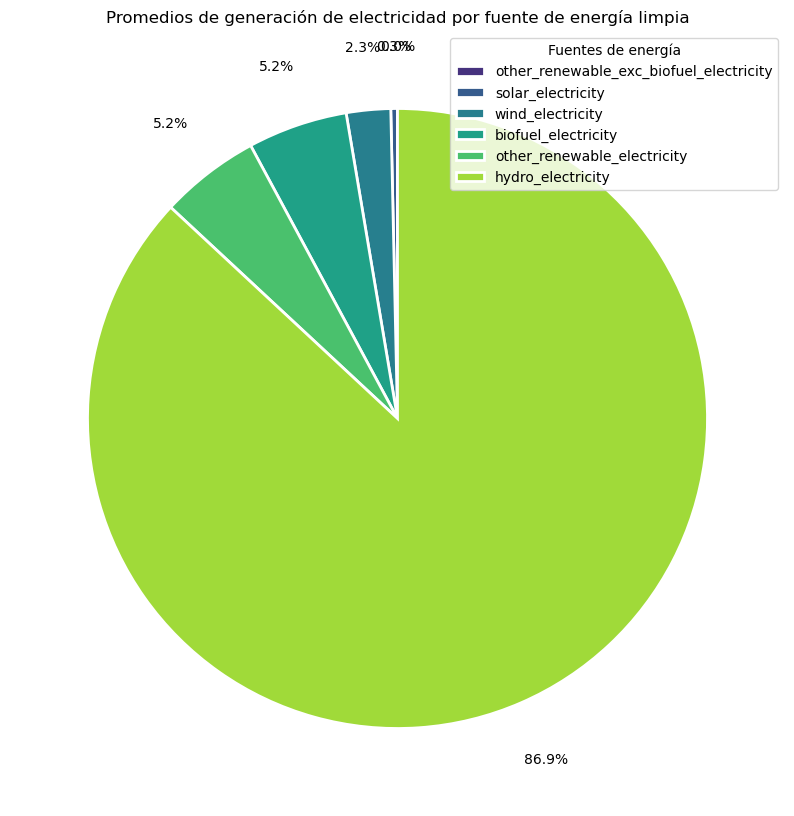

In [31]:
# Se realiza el gráfico correspondiente 
sns.set_palette("viridis")
plt.figure(figsize=(10, 12))
wedgeprops = {'linewidth': 2, 'edgecolor': 'white'}
plt.pie(df_promedios['Promedios'], autopct='%1.1f%%', startangle=90, pctdistance=1.2, wedgeprops=wedgeprops)
plt.legend(df_promedios.index, title='Fuentes de energía', bbox_to_anchor=(1, 1), loc='upper right')
plt.title('Promedios de generación de electricidad por fuente de energía limpia')
plt.show()

Se observa que dentro de la energías denominadas limpias, la energía hidraúlica es la que más produce electricidad en America del Sur, Luego le siguen los bio combustibles que son los derivados de fuentes orgánicas como la biomasa y residuos orgánicos y en cuarto lugar la enegía eolica, que posteriormente se analizará en detalle. 

In [32]:
# Se calculan los promedios de la generación de enería de origen eolica de los países de America del Sur. 
promedios_wind_electricity = electrica.groupby('country')['wind_electricity'].mean()
df_promedios_wind = pd.DataFrame({'country': promedios_wind_electricity.index , 'promedio_wind_electricity': promedios_wind_electricity.values}) 
df_promedios_wind_descentende = df_promedios_wind.sort_values(by='promedio_wind_electricity', ascending=False) 
print(df_promedios_wind_descentende) 

                country  promedio_wind_electricity
2                Brazil                  12.636000
3                 Chile                   1.121174
12              Uruguay                   1.085391
0             Argentina                   0.903217
9                  Peru                   0.346739
4              Colombia                   0.035652
5               Ecuador                   0.026273
13            Venezuela                   0.023955
1               Bolivia                   0.013435
6         French Guiana                   0.000000
7                Guyana                   0.000000
8              Paraguay                   0.000000
10             Suriname                   0.000000
11  Trinidad and Tobago                   0.000000


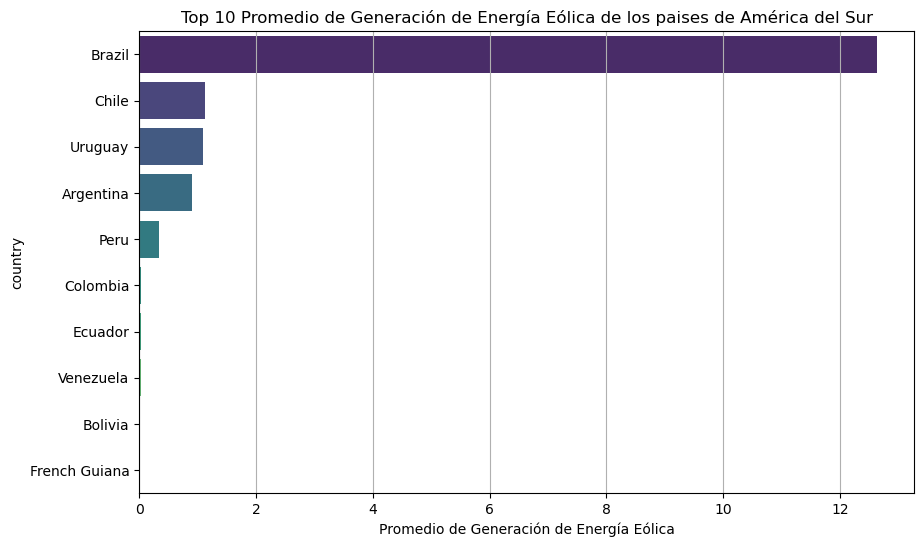

In [33]:
df_top_10 = df_promedios_wind_descentende.head(10)
plt.figure(figsize=(10, 6))
sns.barplot(x='promedio_wind_electricity', y='country', data=df_top_10, palette="viridis")
plt.xlabel('Promedio de Generación de Energía Eólica')
plt.title('Top 10 Promedio de Generación de Energía Eólica de los paises de América del Sur')
plt.grid(axis='x')
# Muestra el gráfico
plt.show()

In [34]:
# Se muestra la columna energía eolica a través de los años según los países
desarrollo_wind = electrica[electrica['year'] >= 1985][['country', 'year', 'wind_electricity']].sort_values(by='year')
print(desarrollo_wind)

                 country  year  wind_electricity
0              Argentina  1998             0.033
46                Brazil  1998             0.005
92              Colombia  1998             0.000
115              Ecuador  1998             0.000
137        French Guiana  1998             0.000
159               Guyana  1998             0.000
293            Venezuela  1998             0.000
23               Bolivia  1998             0.000
181             Paraguay  1998             0.000
203                 Peru  1998             0.000
226             Suriname  1998             0.000
69                 Chile  1998             0.000
248  Trinidad and Tobago  1998             0.000
270              Uruguay  1998             0.000
294            Venezuela  1999             0.000
271              Uruguay  1999             0.000
160               Guyana  1999             0.000
116              Ecuador  1999             0.000
70                 Chile  1999             0.000
24               Bol

In [35]:
fig = px.line(desarrollo_wind,x='year',
    y='wind_electricity',
    color='country',
    line_dash='country',
    line_group='country',
    labels={'wind_electricity': 'Wind Electricity', 'year': 'Year'},
    title='Energía eólica por país a través de los años')
fig.update_layout(
    xaxis_title='Año',
    yaxis_title='Energía eólica (teravatios-hora)',
    width=1000,
    height=600,
    plot_bgcolor='white',
    showlegend=True,
    yaxis=dict(range=[0, 80]),
    xaxis=dict(range=[2004, desarrollo_wind['year'].max()])
)
fig.update_traces(line_shape='linear', line_simplify=True)
fig.show()

In [43]:
# Se muestra la columna energía eolica a través de los años según los países
desarrollo_biofuel = electrica[electrica['year'] >= 1985][['country', 'year', 'biofuel_electricity']].sort_values(by='year')
print(desarrollo_biofuel)

                 country  year  biofuel_electricity
0              Argentina  1998                0.680
46                Brazil  1998                7.844
92              Colombia  1998                0.496
115              Ecuador  1998                0.000
137        French Guiana  1998                0.000
159               Guyana  1998                0.041
293            Venezuela  1998                0.000
23               Bolivia  1998                0.054
181             Paraguay  1998                0.000
203                 Peru  1998                0.158
226             Suriname  1998                0.000
69                 Chile  1998                0.941
248  Trinidad and Tobago  1998                0.020
270              Uruguay  1998                0.035
294            Venezuela  1999                0.000
271              Uruguay  1999                0.035
160               Guyana  1999                0.041
116              Ecuador  1999                0.000
70          

In [45]:
fig = px.line(desarrollo_biofuel,x='year',
    y='biofuel_electricity',
    color='country',
    line_dash='country',
    line_group='country',
    labels={'biofuel_electricity': 'biofuel Electricity', 'year': 'Year'},
    title='Energía eólica por país a través de los años')
fig.update_layout(
    xaxis_title='Año',
    yaxis_title='Energía eólica (teravatios-hora)',
    width=1000,
    height=600,
    plot_bgcolor='white',
    showlegend=True,
    yaxis=dict(range=[0, 80]),
    xaxis=dict(range=[2004, desarrollo_biofuel['year'].max()])
)
fig.update_traces(line_shape='linear', line_simplify=True)
fig.show()

In [37]:
electrica['country'] = electrica['country'].astype(str)
unique_countries = electrica['country'].unique()
print(unique_countries)

['Argentina' 'Bolivia' 'Brazil' 'Chile' 'Colombia' 'Ecuador'
 'French Guiana' 'Guyana' 'Paraguay' 'Peru' 'Suriname'
 'Trinidad and Tobago' 'Uruguay' 'Venezuela']


In [38]:
"%pip install plotly"
import plotly.express as px
fig = px.scatter_geo(electrica,locations='country',locationmode='country names',title='Ubicación de los Países',projection='natural earth',color_continuous_scale='viridis',size_max=40,)
fig.update_geos(projection_scale=5)
fig.update_layout(geo=dict(showframe=False,showcoastlines=False,projection_scale=5,),margin=dict(l=0, r=0, t=0, b=0),)
fig.show()

## Columns and their description para el glosario

column 	description
iso_code 	ISO 3166-1 alpha-3 three-letter country codes
country 	Geographic location
year 	Year of observation
coal_prod_change_pct 	Annual percentage change in coal production
coal_prod_change_twh 	Annual change in coal production, measured in terawatt-hours
gas_prod_change_pct 	Annual percentage change in gas production
gas_prod_change_twh 	Annual change in gas production, measured in terawatt-hours
oil_prod_change_pct 	Annual percentage change in oil production
oil_prod_change_twh 	Annual change in oil production, measured in terawatt-hours
energy_cons_change_pct 	Annual percentage change in primary energy consumption
energy_cons_change_twh 	Annual change in primary energy consumption, measured in terawatt-hours
biofuel_share_elec 	Share of electricity consumption that comes from biofuels
biofuel_cons_change_pct 	Annual percentage change in biofuel consumption
biofuel_share_energy 	Share of primary energy consumption that comes from biofuels
biofuel_cons_change_twh 	Annual change in biofuel consumption, measured in terawatt-hours
biofuel_consumption 	Primary energy consumption from biofuels, measured in terawatt-hours
biofuel_elec_per_capita 	Per capita electricity consumption from biofuels, measured in kilowatt-hours
biofuel_cons_per_capita 	Per capita primary energy consumption from biofuels, measured in kilowatt-hours
carbon_intensity_elec 	Carbon intensity of electricity production, measured in grams of carbon dioxide emitted per kilowatt-hour
coal_share_elec 	Share of electricity consumption that comes from coal
coal_cons_change_pct 	Annual percentage change in coal consumption
coal_share_energy 	Share of primary energy consumption that comes from coal
coal_cons_change_twh 	Annual change in coal consumption, measured in terawatt-hours
coal_consumption 	Primary energy consumption from coal, measured in terawatt-hours
coal_elec_per_capita 	Per capita electricity consumption from coal, measured in kilowatt-hours
coal_cons_per_capita 	Per capita primary energy consumption from coal, measured in kilowatt-hours
coal_production 	Coal production, measured in terawatt-hours
coal_prod_per_capita 	Per capita coal production, measured in kilowatt-hours
electricity_generation 	Electricity generation, measured in terawatt-hours
biofuel_electricity 	Electricity generation from biofuels, measured in terawatt-hours
coal_electricity 	Electricity generation from coal, measured in terawatt-hours
fossil_electricity 	Electricity generation from fossil fuels, measured in terawatt-hours. This is the sum of electricity generation from coal, oil and gas.
gas_electricity 	Electricity generation from gas, measured in terawatt-hours
hydro_electricity 	Electricity generation from hydropower, measured in terawatt-hours
nuclear_electricity 	Electricity generation from nuclear power, measured in terawatt-hours
oil_electricity 	Electricity generation from oil, measured in terawatt-hours
other_renewable_electricity 	Electricity generation from other renewable sources, measured in terawatt-hours
other_renewable_exc_biofuel_electricity 	Electricity generation from other renewable sources excluding biofuels, measured in terawatt-hours
renewables_electricity 	Electricity generation from renewables, measured in terawatt-hours
solar_electricity 	Electricity generation from solar, measured in terawatt-hours
wind_electricity 	Electricity generation from wind, measured in terawatt-hours
energy_per_gdp 	Energy consumption per unit of GDP. This is measured in kilowatt-hours per 2011 international-$.
energy_per_capita 	Primary energy consumption per capita, measured in kilowatt-hours per year
fossil_cons_change_pct 	Annual percentage change in fossil fuel consumption
fossil_share_energy 	Share of primary energy consumption that comes from fossil fuels
fossil_cons_change_twh 	Annual change in fossil fuel consumption, measured in terawatt-hours
fossil_fuel_consumption 	Fossil fuel consumption, measured in terawatt-hours. This is the sum of primary energy from coal, oil and gas.
fossil_energy_per_capita 	Per capita fossil fuel consumption, measured in kilowatt-hours. This is the sum of primary energy from coal, oil and gas.
fossil_cons_per_capita 	Per capita fossil fuel consumption, measured in kilowatt-hours. This is the sum of primary energy from coal, oil and gas.
fossil_share_elec 	Share of electricity consumption that comes from fossil fuels (coal, oil and gas combined)
gas_share_elec 	Share of electricity consumption that comes from gas
gas_cons_change_pct 	Annual percentage change in gas consumption
gas_share_energy 	Share of primary energy consumption that comes from gas
gas_cons_change_twh 	Annual change in gas consumption, measured in terawatt-hours
gas_consumption 	Primary energy consumption from gas, measured in terawatt-hours
gas_elec_per_capita 	Per capita electricity consumption from gas, measured in kilowatt-hours
gas_energy_per_capita 	Per capita primary energy consumption from gas, measured in kilowatt-hours
gas_production 	Gas production, measured in terawatt-hours
gas_prod_per_capita 	Per capita gas production, measured in kilowatt-hours
hydro_share_elec 	Share of electricity consumption that comes from hydropower
hydro_cons_change_pct 	Annual percentage change in hydropower consumption
hydro_share_energy 	Share of primary energy consumption that comes from hydropower
hydro_cons_change_twh 	Annual change in hydropower consumption, measured in terawatt-hours
hydro_consumption 	Primary energy consumption from hydropower, measured in terawatt-hours
hydro_elec_per_capita 	Per capita electricity consumption from hydropower, measured in kilowatt-hours
hydro_energy_per_capita 	Per capita primary energy consumption from hydropower, measured in kilowatt-hours
low_carbon_share_elec 	Share of electricity consumption that comes from low-carbon sources. This is the sum of electricity from renewables and nuclear
low_carbon_electricity 	Electricity generation from low-carbon sources, measured in terawatt-hours. This is the sum of electricity generation from renewables and nuclear power
low_carbon_elec_per_capita 	Per capita electricity consumption from low-carbon sources, measured in kilowatt-hours
low_carbon_cons_change_pct 	Annual percentage change in low-carbon energy consumption
low_carbon_share_energy 	Share of primary energy consumption that comes from low-carbon sources. This is the sum of primary energy from renewables and nuclear
low_carbon_cons_change_twh 	Annual change in low-carbon energy consumption, measured in terawatt-hours
low_carbon_consumption 	Primary energy consumption from low-carbon sources, measured in terawatt-hours
low_carbon_energy_per_capita 	Per capita primary energy consumption from low-carbon sources, measured in kilowatt-hours
nuclear_share_elec 	Share of electricity consumption that comes from nuclear power
nuclear_cons_change_pct 	Annual percentage change in nuclear consumption
nuclear_share_energy 	Share of primary energy consumption that comes from nuclear power
nuclear_cons_change_twh 	Annual change in nuclear consumption, measured in terawatt-hours
nuclear_consumption 	Primary energy consumption from nuclear power, measured in terawatt-hours
nuclear_elec_per_capita 	Per capita electricity consumption from nuclear power, measured in kilowatt-hours
nuclear_energy_per_capita 	Per capita primary energy consumption from nuclear, measured in kilowatt-hours
oil_share_elec 	Share of electricity consumption that comes from oil
oil_cons_change_pct 	Annual percentage change in oil consumption
oil_share_energy 	Share of primary energy consumption that comes from oil
oil_cons_change_twh 	Annual change in oil consumption, measured in terawatt-hours
oil_consumption 	Primary energy consumption from oil, measured in terawatt-hours
oil_elec_per_capita 	Primary energy consumption from oil, measured in terawatt-hours
oil_energy_per_capita 	Per capita primary energy consumption from oil, measured in kilowatt-hours
oil_production 	Oil production, measured in terawatt-hours
oil_prod_per_capita 	Per capita oil production, measured in kilowatt-hours
other_renewables_elec_per_capita 	Per capita electricity consumption from other renewables, measured in kilowatt-hours
other_renewables_share_elec 	Share of electricity consumption that comes from other renewables
other_renewables_cons_change_pct 	Annual percentage change in energy consumption from other renewables
other_renewables_share_energy 	Share of primary energy consumption that comes from other renewables
other_renewables_cons_change_twh 	Annual change in other renewable consumption, measured in terawatt-hours
other_renewable_consumption 	Primary energy consumption from other renewables, measured in terawatt-hours
other_renewables_energy_per_capita 	Per capita primary energy consumption from other renewables, measured in kilowatt-hours
per_capita_electricity 	Electricity consumption per capita, measured in kilowatt-hours
population 	Total population
primary_energy_consumption 	Primary energy consumption, measured in terawatt-hours
renewables_elec_per_capita 	Per capita primary energy consumption from renewables, measured in kilowatt-hours
renewables_share_elec 	Share of electricity consumption that comes from renewables
renewables_cons_change_pct 	Annual percentage change in renewable energy consumption
renewables_share_energy 	Share of primary energy consumption that comes from renewables
renewables_cons_change_twh 	Annual change in renewable energy consumption, measured in terawatt-hours
renewables_consumption 	Primary energy consumption from renewables, measured in terawatt-hours
renewables_energy_per_capita 	Per capita electricity consumption from renewables, measured in kilowatt-hours
solar_share_elec 	Share of electricity consumption that comes from solar
solar_cons_change_pct 	Annual percentage change in solar consumption
solar_share_energy 	Share of primary energy consumption that comes from solar
solar_cons_change_twh 	Annual change in solar consumption, measured in terawatt-hours
solar_consumption 	Primary energy consumption from solar, measured in terawatt-hours
solar_elec_per_capita 	Per capita electricity consumption from solar, measured in kilowatt-hours
solar_energy_per_capita 	Per capita primary energy consumption from solar, measured in kilowatt-hours
gdp 	Total real gross domestic product, inflation-adjusted
wind_share_elec 	Share of electricity consumption that comes from wind
wind_cons_change_pct 	Annual percentage change in wind consumption
wind_share_energy 	Share of primary energy consumption that comes from wind
wind_cons_change_twh 	Annual change in wind consumption, measured in terawatt-hours
wind_consumption 	Primary energy consumption from wind, measured in terawatt-hours
wind_elec_per_capita 	Per capita electricity consumption from wind, measured in kilowatt-hours
wind_energy_per_capita 	Per capita primary energy consumption from wind, measured in kilowatt-hours